In [188]:
import pandas as pd
import numpy as np
import datetime as dt
from yellowbrick.target import FeatureCorrelation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

path = r"D:\OneDrive - Universität zu Köln\Uni\AA\Project\aa_project\Abgabe\Data"

In [189]:
#Berlin
df_base = pd.read_csv(path + r"\berlin_final.csv")
df_w = pd.read_csv(path + r"\berlin_weather.csv")
berlin = True

# Frankfurt
# df_base = pd.read_csv(path + r"\frankfurt_final.csv")
# df_w = pd.read_csv(path + r"\frankfurt_weather.csv")
# berlin = False

df_w.drop(columns = ["sid", "Unnamed: 0"], inplace = True)
df_w.datetime = pd.to_datetime(df_w.datetime)

def get_trips(datetime):
    return len(df_base[(df_base["month"] == datetime.month) & (df_base["date"] == datetime.day) & (df_base["hour"] == datetime.hour)].index)

In [190]:
df_w["num_trips"] = df_w["datetime"].apply(get_trips)

In [191]:
def get_month(datetime):
    return datetime.month
def get_hour(datetime):
    return datetime.hour
def get_weekday(datetime):
    return datetime.weekday() + 1

In [192]:
df_w['month'] = df_w['datetime'].apply(get_month)
df_w['hour'] = df_w['datetime'].apply(get_hour)
df_w['weekday'] = df_w['datetime'].apply(get_weekday)


In [193]:
if berlin:
    start = dt.datetime.strptime('2019-03-15 13:00:00', '%Y-%m-%d %H:%M:%S')
    end = dt.datetime.strptime('2019-03-19 08:00:00', '%Y-%m-%d %H:%M:%S')

    df_w.drop(df_w[(df_w.datetime >= start) &
             (df_w.datetime <= end)].index, inplace = True)

In [194]:
df = df_w[['month', 'weekday', 'hour', 'num_trips', 'temperature', 'precipitation', 'wind_speed']] #
df_target = df[['num_trips']]
df_data = df.drop('num_trips', axis=1)

c:\users\janfd\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
c:\users\janfd\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


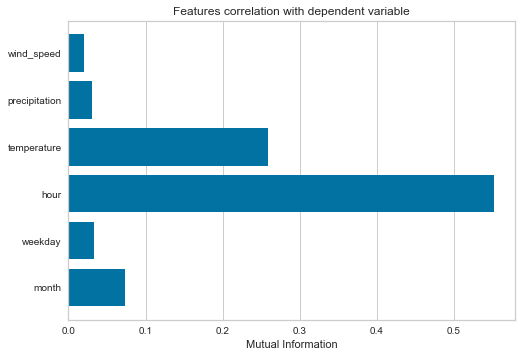

In [195]:
X, y = df_data, df_target

features = np.array(df_data.columns)

# Create a list of the discrete features
discrete = [False for _ in range(len(features))]
discrete[1] = True

# Instantiate the visualizer
visualizer = FeatureCorrelation(method='mutual_info-regression', labels=features)

visualizer.fit(X, y, discrete_features=discrete, random_state=0)
visualizer.show()

In [196]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=1)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

regr = MLPRegressor(hidden_layer_sizes=(20,20,20), random_state=1, max_iter=1000).fit(X_train, y_train)
pred = regr.predict(X_test)

regr.score(X_test, y_test)

c:\users\janfd\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.7831792783338385

In [197]:
# pred = regr.predict(X_train)
pred = pred.reshape(len(pred),1)

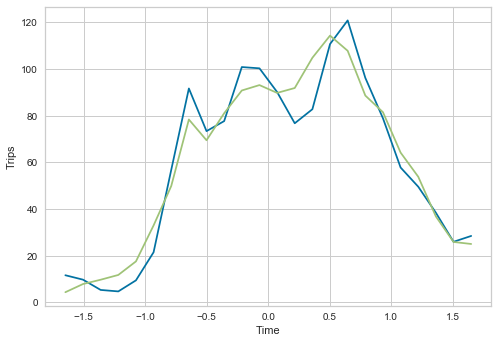

In [198]:
df_plot = pd.DataFrame()
df_plot['hour'] = X_test[:, 2]
df_plot['target'] = y_test.reset_index(drop=True)
df_plot['pred'] = pred
df_plot = df_plot.groupby(df_plot.hour).mean()
df_plot.sort_index(inplace=True)
plt.plot(df_plot.hour, df_plot.target, label='Trips in each hour')
plt.plot(df_plot.hour, df_plot.pred, label='Pred. Trips in each hour')
plt.ylabel('Trips')
plt.xlabel('Time')
# plt.xlim(0, 23)
# plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
# plt.savefig('trip_hour.png')
plt.show()